<a href="https://colab.research.google.com/github/Ariefsuhanda/Latihan-Python/blob/main/Liniear_Regression_NYSE_Prediction_Google_Stocks_Price_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library dan dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from google.colab import files
filenya = files.upload()

Saving prices.csv to prices.csv


In [2]:
# Import library yang dibutukan
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
# Import io dan buka data
prices =  pd.read_csv('prices.csv', header=0)
prices

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [8]:
# Kita akan analisis data saham google pilih indeksnya
google_stocks = prices[prices.symbol == 'GOOG']
google_stocks.dtypes

date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object

In [9]:
# di reshape
google_stocks_prices = google_stocks.close.values.astype('float64').reshape(1762, 1)
google_stocks_prices

array([[626.751061],
       [623.991055],
       [608.261023],
       ...,
       [785.049988],
       [782.789978],
       [771.820007]])

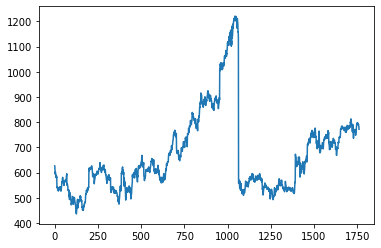

In [10]:
# plotkan datanya
plt.plot(google_stocks_prices)
plt.show()

In [12]:
# rescale data
scaler = MinMaxScaler(feature_range=(0, 1))
google_stocks_prices = scaler.fit_transform(google_stocks_prices)

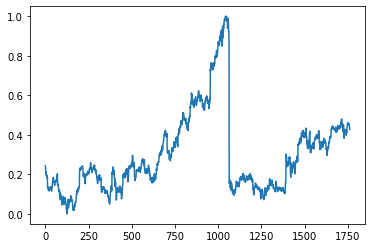

In [13]:
plt.plot(google_stocks_prices)
plt.show()

In [14]:
# pisahkan data training dan test
train_size = int(len(google_stocks_prices) * 0.75)
test_size = len(google_stocks_prices) - train_size
train, test = google_stocks_prices[0:train_size,:], google_stocks_prices[train_size:len(google_stocks_prices),:]
print('train: ',len(train))
print('test: ',  len(test))

train:  1321
test:  441


In [15]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
# convert train and test data to datasets
look_back = 1
train_X, train_y = create_dataset(train, look_back)
test_X, test_Y = create_dataset(test, look_back)

In [17]:
# reshape into X = t and Y = t+1
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [18]:
#LSTM architecture
model = Sequential()

# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, 
               return_sequences=True, 
               input_shape=(train_X.shape[1],1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.5))

# The output layer
model.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

In [19]:
# Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
start = time.time()
history = model.fit(train_X,
                  train_y,
                  epochs=200,
                  batch_size=35, 
                  validation_split=0.05, 
                  verbose=1)
print ('compilation time : ', time.time() - start)

Epoch 1/200
36/36 [==============================] - 8s 51ms/step - loss: 0.1268 - val_loss: 0.0156
Epoch 2/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0485 - val_loss: 0.0283
Epoch 3/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0286 - val_loss: 7.6683e-04
Epoch 4/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0091 - val_loss: 0.0016
Epoch 5/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0060 - val_loss: 7.3999e-04
Epoch 6/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 3.3035e-04
Epoch 7/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 3.0181e-04
Epoch 8/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0047 - val_loss: 1.4338e-04
Epoch 9/200
36/36 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 2.0684e-04
Epoch 10/200
36/36 [==============================] - 0s 7ms/step - loss: 0.0026 - v

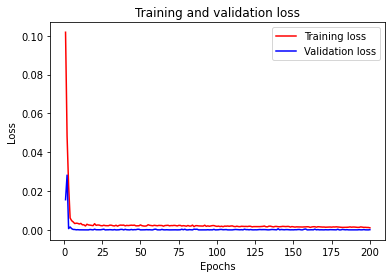

In [20]:
history_dict = history.history
history_dict.keys()

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
test_X = np.array(test_X)
test_X = np.reshape(test_X, (test_X.shape[0],test_X.shape[1],1))

test_Y = np.array(test_Y)
test_Y = np.reshape(test_Y, (-1,1))


predicted_stock_price = model.predict(test_X)
# Inverse transform is to denormalize the predicted_stock_price
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
google_stocks_prices = scaler.inverse_transform(test_Y)
predicted_stock_price.shape

(439, 1)

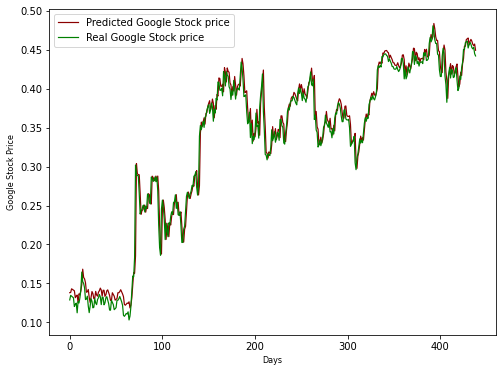

In [22]:
plt.figure(figsize=(8,6))
plt.subplot(1,1,1)
plt.plot(predicted_stock_price, linewidth=1.2, color='darkred', label='Predicted Google Stock price')
plt.plot(google_stocks_prices, linewidth=1.2, color='green', label='Real Google Stock price')
plt.xlabel('Days', fontsize=8)
plt.ylabel('Google Stock Price', fontsize=8)
plt.legend(loc='best', fontsize=10)
plt.show()